# Module 4 - Linear Model Diagnosis and Validation

## 4A:  Linear Model Diagnosis

In [514]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

### Anscombe's Quartet example 

In [515]:
anscombe = pd.read_csv('Anscombe_quartet_data.csv')
anscombe

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47
5,14.0,9.96,8.10,8.84,8.0,7.04
6,6.0,7.24,6.13,6.08,8.0,5.25
7,4.0,4.26,3.10,5.39,19.0,12.50
8,12.0,10.84,9.13,8.15,8.0,5.56
9,7.0,4.82,7.26,6.42,8.0,7.91


<AxesSubplot:xlabel='x123', ylabel='y1'>

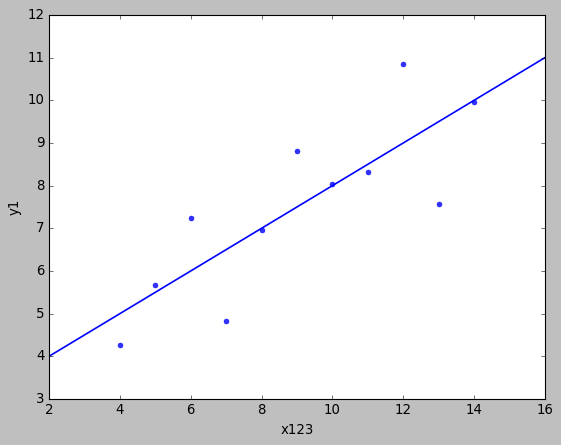

In [516]:
sns.regplot(data = anscombe, x = 'x123', y = 'y1', ci = None, truncate = False)

In [517]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(anscombe[['x123']], anscombe['y1'])
print(m1.intercept_, m1.coef_)

3.0000909090909103 [0.50009091]


<AxesSubplot:xlabel='x123', ylabel='y2'>

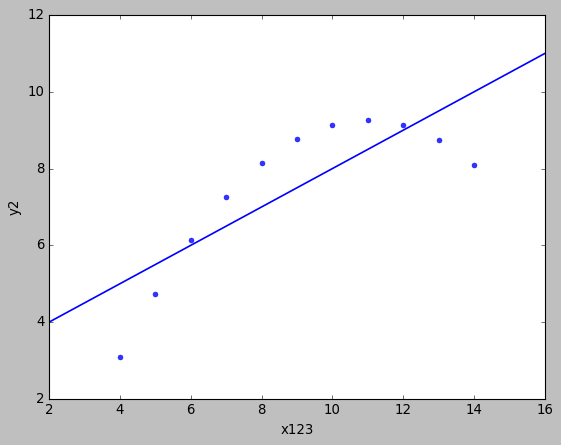

In [518]:
sns.regplot(data = anscombe, x = 'x123', y = 'y2', ci = None, truncate = False)

In [519]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(anscombe[['x123']], anscombe['y1'])
print(m1.intercept_, m1.coef_)

3.0000909090909103 [0.50009091]


<AxesSubplot:xlabel='x123', ylabel='y3'>

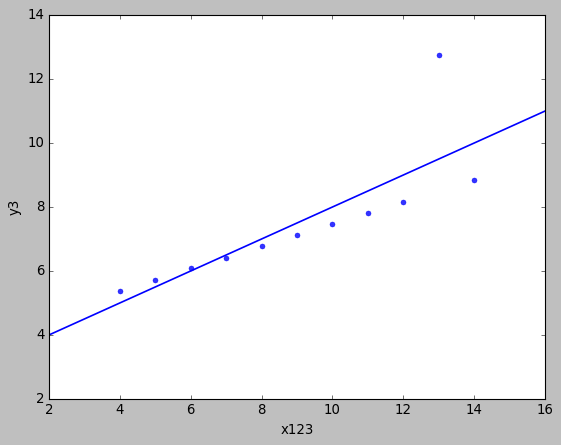

In [520]:
sns.regplot(data = anscombe, x = 'x123', y = 'y3', ci = None, truncate = False)

In [521]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(anscombe[['x123']], anscombe['y1'])
print(m1.intercept_, m1.coef_)

3.0000909090909103 [0.50009091]


<AxesSubplot:xlabel='x4', ylabel='y4'>

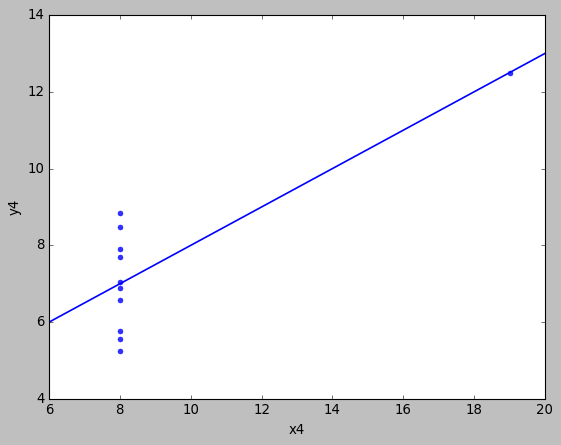

In [522]:
sns.regplot(data = anscombe, x = 'x4', y = 'y4', ci = None, truncate = False)

In [523]:
m1 = LinearRegression(fit_intercept=True)
m1.fit(anscombe[['x123']], anscombe['y1'])
print(m1.intercept_, m1.coef_)

3.0000909090909103 [0.50009091]


## Model Diagnosis

In [524]:
np.random.seed(123)  # Ensure repeatability
num_points = 200
sample_1 = pd.DataFrame(np.random.uniform(0,100, size = (num_points,1)), columns = ['X1'])
mu, sigma = 0, 100
sample_1['Y'] = 100 + 5*sample_1['X1']  + np.random.normal(mu,sigma, num_points)
#  Add an outlier
sample_1['Y'][196] = sample_1['Y'][196] + 400

In [525]:
sample_1

,X1,Y
0,69.646919,374.153215
1,28.613933,250.360392
2,22.685145,253.734323
3,55.131477,522.850321
4,71.946897,490.472907
...,...,...
195,63.590036,321.175740
196,3.219793,558.055735
197,74.478066,493.083079
198,47.291300,111.303003


<AxesSubplot:xlabel='X1', ylabel='Y'>

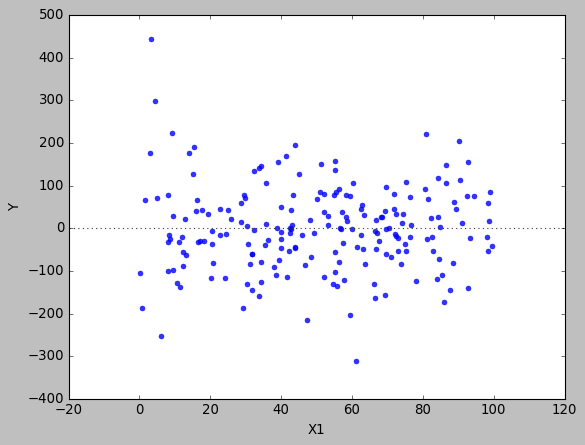

In [526]:
sns.residplot(x = sample_1['X1'], y = sample_1['Y'])

<AxesSubplot:xlabel='X1', ylabel='Y'>

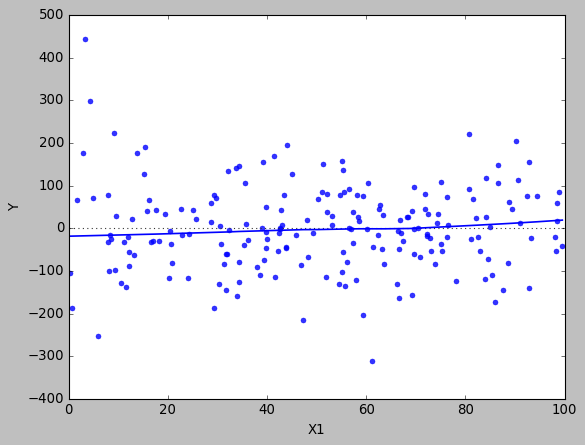

In [527]:
sns.residplot(x = sample_1['X1'], y = sample_1['Y'], lowess = True)

In [528]:
# Use statsmodels to calculate residuals standard error
rse = np.sqrt(sm.OLS(sample_1['Y'] ,sample_1[['X1']]).fit().mse_resid)
rse

110.49418207683577

<AxesSubplot:xlabel='X1', ylabel='Y'>

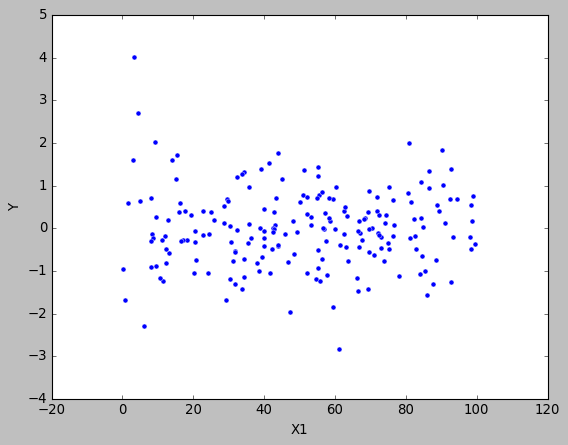

In [529]:
# Create standardized residuals plot
m2 = LinearRegression(fit_intercept=True)
m2.fit(sample_1[['X1']], sample_1['Y'])
y_hat = m2.predict(sample_1[['X1']])  # Calculate predictions
std_resids = (sample_1['Y'] - y_hat)/rse  # Calculate standardized residuals
sns.scatterplot(x = sample_1['X1'], y = std_resids)

<AxesSubplot:ylabel='Y'>

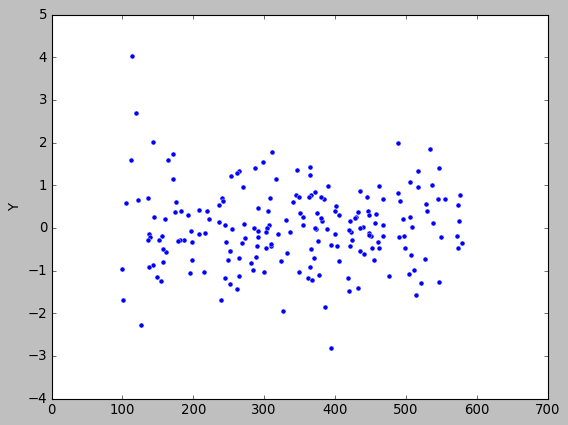

In [530]:
sns.scatterplot(x = y_hat, y = std_resids)

<AxesSubplot:xlabel='Y', ylabel='Count'>

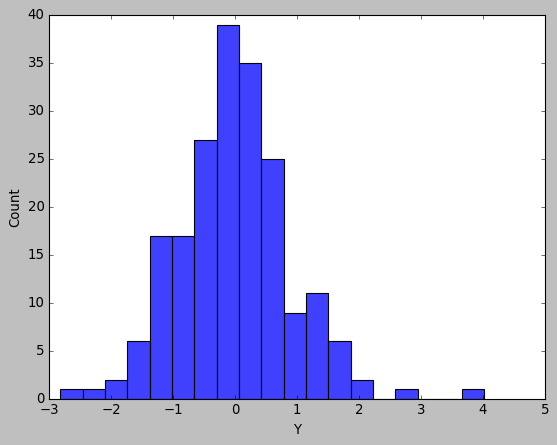

In [531]:
sns.histplot(std_resids)

Check residuals for normality

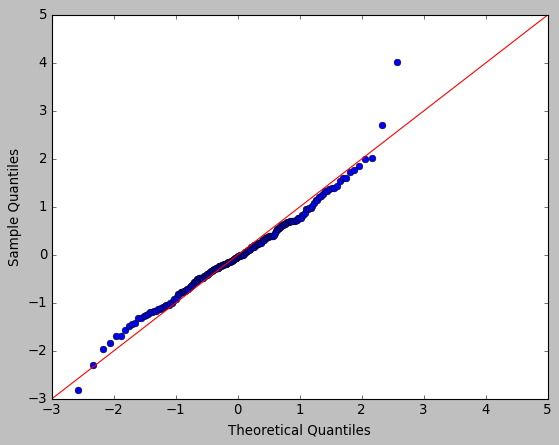

In [532]:
sm.qqplot(std_resids, line='45');   # semi-colon fixes "glitch" in sm qqplot function that produces two plots

Generate data with a nonlinear term

In [533]:
np.random.seed(2)  # Ensure repeatability
num_points = 200
sample_2 = pd.DataFrame(np.random.uniform(0,100, size = (num_points,1)), columns = ['X1'])
mu, sigma = 0, 5000
sample_2['Y'] = 100 + 50*sample_2['X1'] + 5*sample_2['X1']**2  + np.random.normal(mu,sigma, num_points)

In [534]:
sample_2

,X1,Y
0,43.599490,32328.015364
1,2.592623,4368.844021
2,54.966248,25613.555950
3,43.532239,1822.662370
4,42.036780,12862.561044
...,...,...
195,38.833418,6698.788109
196,92.590160,49674.305049
197,57.027421,18922.768451
198,91.671461,51361.293838


<AxesSubplot:xlabel='X1', ylabel='Y'>

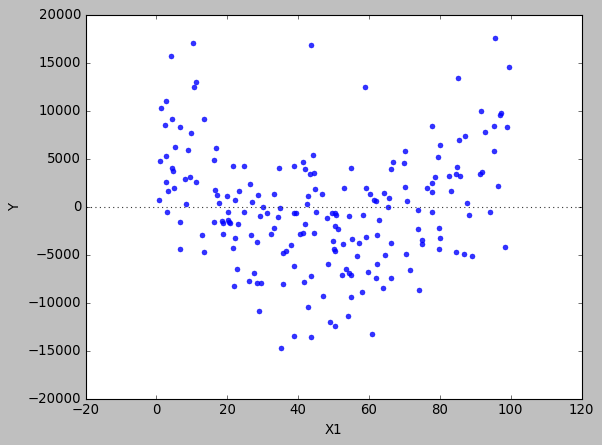

In [535]:
sns.residplot(x = sample_2['X1'], y = sample_2['Y'])

[Text(0.5, 1.0, 'Standardized Residuals')]

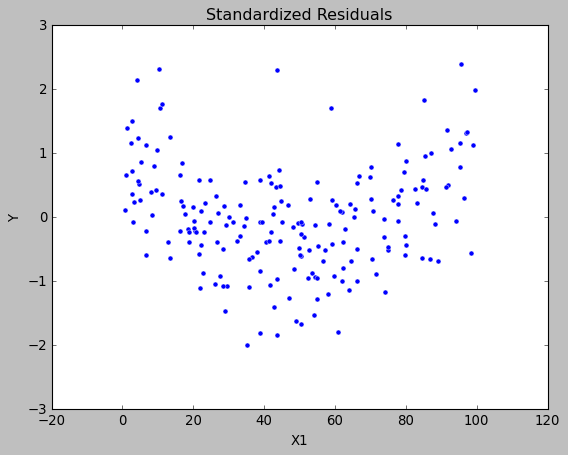

In [536]:
# Create standardized residuals plot
rse = np.sqrt(sm.OLS(sample_2['Y'] ,sample_2[['X1']]).fit().mse_resid)
m3 = LinearRegression(fit_intercept=True)
m3.fit(sample_2[['X1']], sample_2['Y'])
y_hat = m3.predict(sample_2[['X1']])  # Calculate predictions
std_resids = (sample_2['Y'] - y_hat)/rse  # Calculate standardized residuals
sns.scatterplot(x = sample_2['X1'], y = std_resids).set(title = 'Standardized Residuals')

[Text(0.5, 1.0, 'Residuals Histogram')]

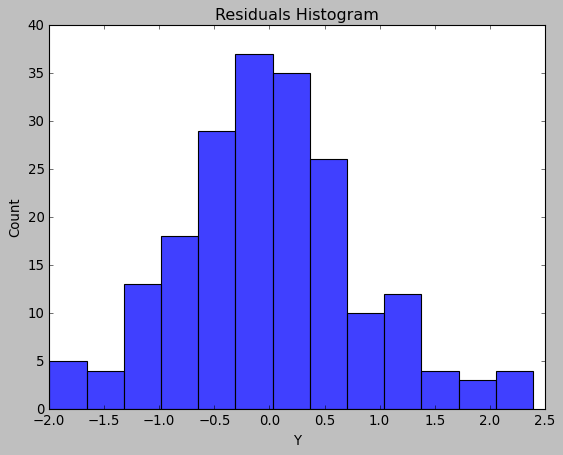

In [537]:
sns.histplot(std_resids).set(title = 'Residuals Histogram')

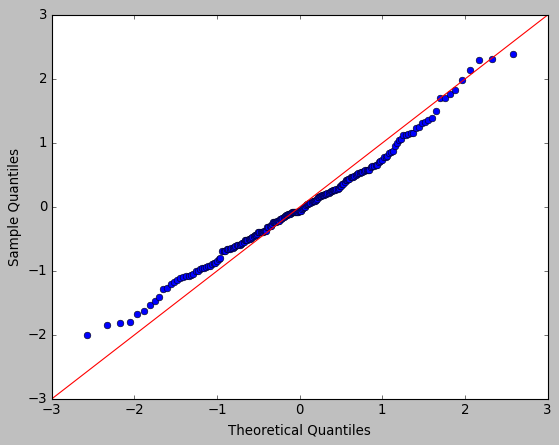

In [538]:
sm.qqplot(std_resids, line = '45');  # semi-colon fixes "glitch" in sm qqplot function that produces two plots

<AxesSubplot:xlabel='X1', ylabel='Y'>

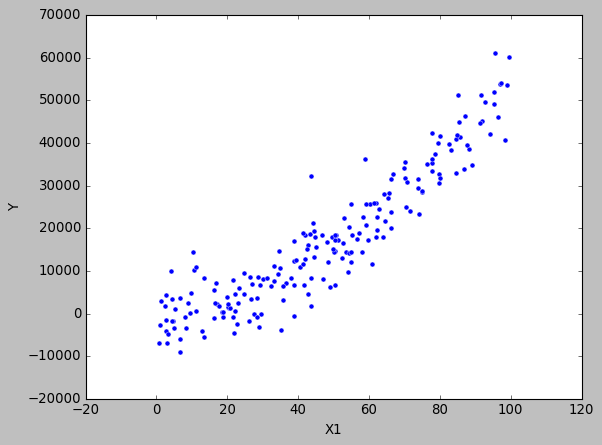

In [539]:
sns.scatterplot(x=sample_2['X1'], y = sample_2['Y'])

Try adding squared term

<AxesSubplot:xlabel='X1^2', ylabel='Y'>

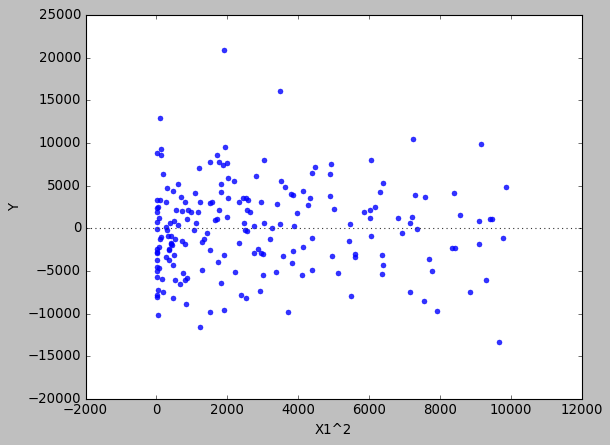

In [540]:
sample_2['X1^2'] =  sample_2['X1']**2
sns.residplot(x = sample_2['X1^2'], y = sample_2['Y'])

In [541]:
#Generate two-predictor dataset
np.random.seed(2)  # Ensure repeatability
num_points = 200
num_vars = 2
sample_3 = pd.DataFrame(np.random.uniform(0,100, size = (num_points,num_vars)), columns = ['X1', 'X2'])
mu, sigma = 0, 1000
sample_3['Y'] = 100 + 50*sample_3['X1'] - 50*sample_3['X2'] + np.random.normal(mu,sigma, num_points)

In [542]:
sample_3

,X1,X2,Y
0,43.599490,2.592623,2477.410390
1,54.966248,43.532239,-783.659019
2,42.036780,33.033482,178.645781
3,20.464863,61.927097,1187.854308
4,29.965467,26.682728,374.088006
...,...,...,...
195,30.061178,59.701655,-1247.098363
196,57.281229,26.544347,-141.756560
197,24.873429,28.967549,-605.497498
198,87.594007,1.875815,3297.748059


<AxesSubplot:xlabel='X1', ylabel='Y'>

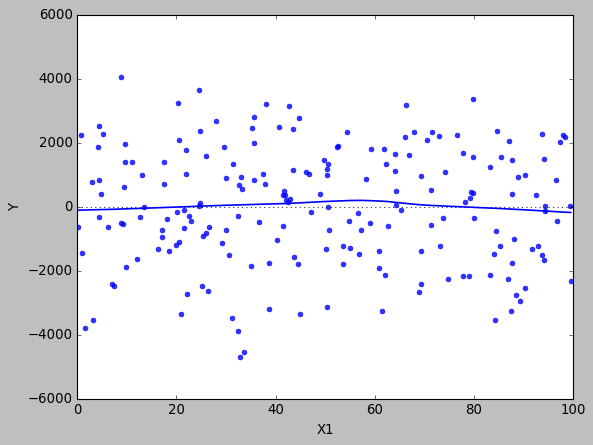

In [543]:
sns.residplot(x = sample_3['X1'], y = sample_3['Y'], lowess = True)

[Text(0.5, 1.0, 'Standardized Residuals')]

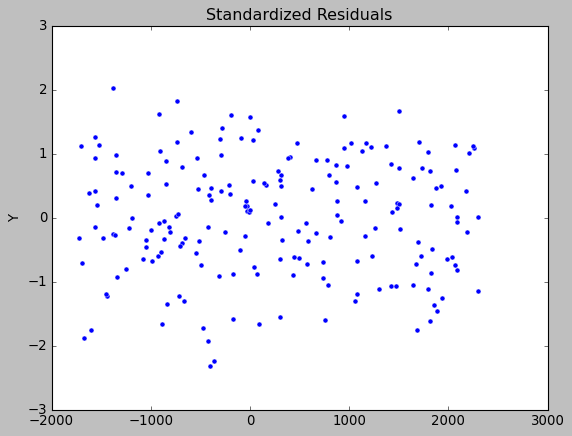

In [544]:
# Create standardized residuals plot
rse = np.sqrt(sm.OLS(sample_3['Y'] ,sample_3[['X1']]).fit().mse_resid)
m3 = LinearRegression(fit_intercept=True)
m3.fit(sample_3[['X1']], sample_3['Y'])
y_hat = m3.predict(sample_3[['X1']])  # Calculate predictions
std_resids = (sample_3['Y'] - y_hat)/rse  # Calculate standardized residuals
sns.scatterplot(x = y_hat, y = std_resids).set(title = 'Standardized Residuals')

In [545]:
m3.score(sample_3[['X1']], sample_3['Y'])

0.2888465694477891

<AxesSubplot:xlabel='Y', ylabel='Count'>

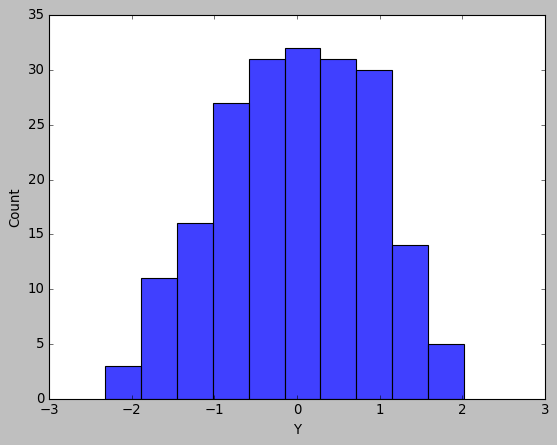

In [546]:
sns.histplot(std_resids)

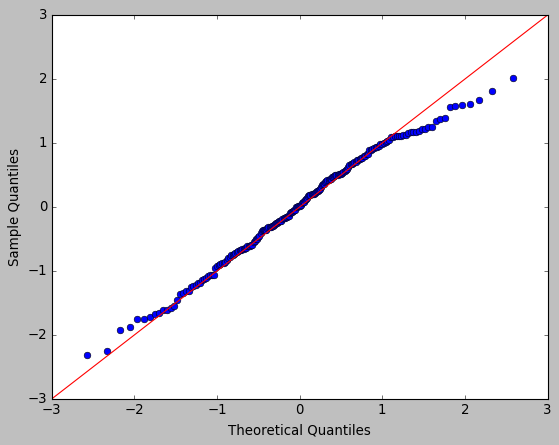

In [547]:
sm.qqplot(std_resids, line = '45');  # semi-colon fixes "glitch" in sm qqplot function that produces two plots

Re-running with both predictors

[Text(0.5, 1.0, 'Standardized Residuals')]

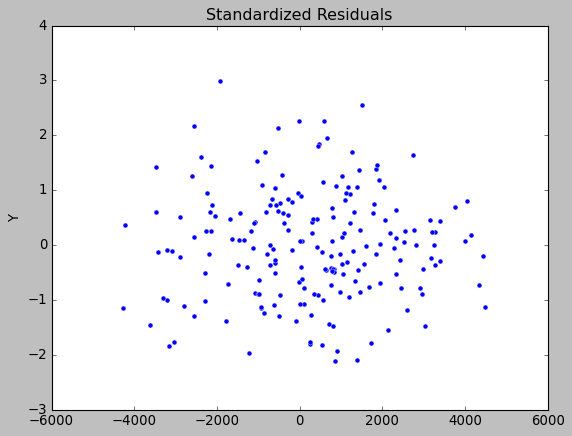

In [548]:
# Create standardized residuals plot
rse = np.sqrt(sm.OLS(sample_3['Y'] ,sample_3[['X1', 'X2']]).fit().mse_resid)
m3 = LinearRegression(fit_intercept=True)
m3.fit(sample_3[['X1', 'X2']], sample_3['Y'])
y_hat = m3.predict(sample_3[['X1', 'X2']])  # Calculate predictions
std_resids = (sample_3['Y'] - y_hat)/rse  # Calculate standardized residuals
sns.scatterplot(x = y_hat, y = std_resids).set(title = 'Standardized Residuals')

In [549]:
m3.score(sample_3[['X1', 'X2']], sample_3['Y'])

0.7742297054410681

<AxesSubplot:xlabel='Y', ylabel='Count'>

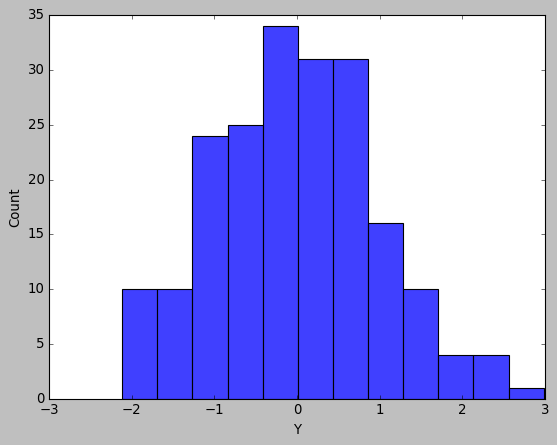

In [550]:
sns.histplot(std_resids)

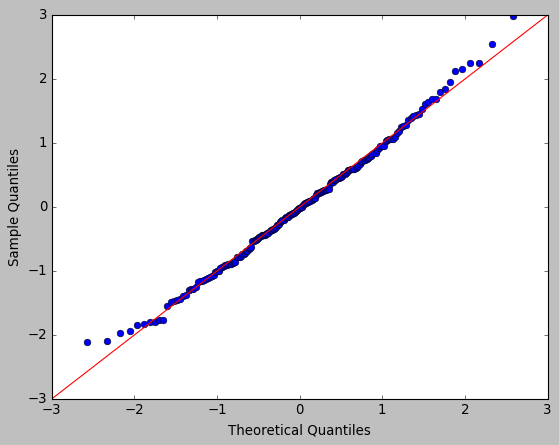

In [551]:
sm.qqplot(std_resids, line = '45');  # semi-colon fixes "glitch" in sm qqplot function that produces two plots

Generate skewed predictor

In [552]:
np.random.seed(2)  # Ensure repeatability
num_points = 200
sample_3 = pd.DataFrame(np.random.uniform(0,100, size = (num_points,1)), columns = ['X1'])
sample_3['X1'] = np.exp(sample_3['X1']/10)
mu, sigma = 0, 10
sample_3['Y'] = 100 + 5*sample_3['X1']  + np.random.normal(mu,sigma, num_points)

<AxesSubplot:xlabel='X1', ylabel='Y'>

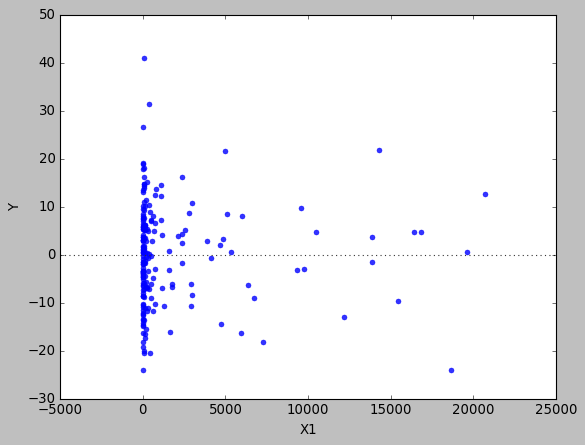

In [553]:
sns.residplot(x = sample_3['X1'], y = sample_3['Y'])

<AxesSubplot:xlabel='X1', ylabel='Count'>

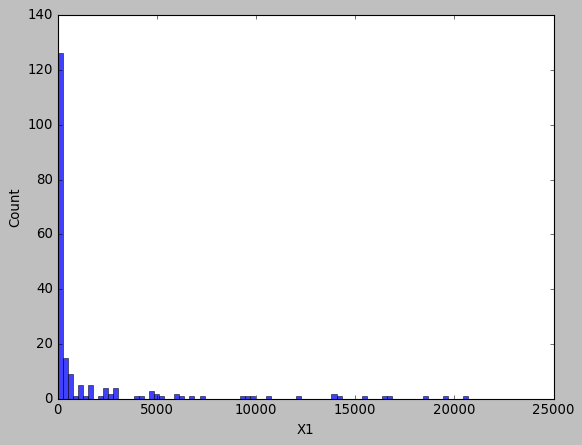

In [554]:
sns.histplot(sample_3['X1'])

<AxesSubplot:ylabel='Y'>

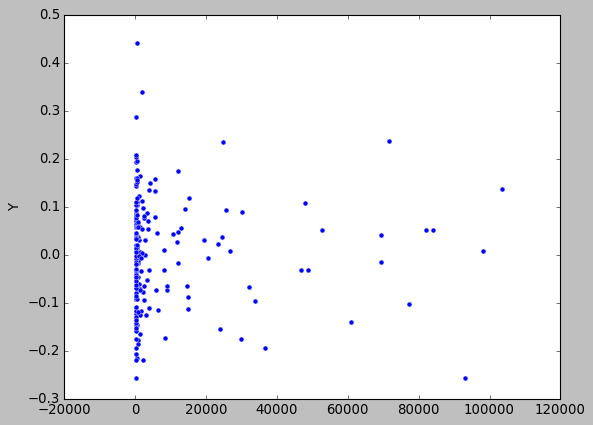

In [555]:
# Create standardized residuals plot
rse = np.sqrt(sm.OLS(sample_3['Y'] ,sample_3[['X1']]).fit().mse_resid)
m3 = LinearRegression(fit_intercept=True)
m3.fit(sample_3[['X1']], sample_3['Y'])
y_hat = m3.predict(sample_3[['X1']])  # Calculate predictions
std_resids = (sample_3['Y'] - y_hat)/rse  # Calculate standardized residuals
sns.scatterplot(x = y_hat, y = std_resids)

<AxesSubplot:xlabel='Y', ylabel='Count'>

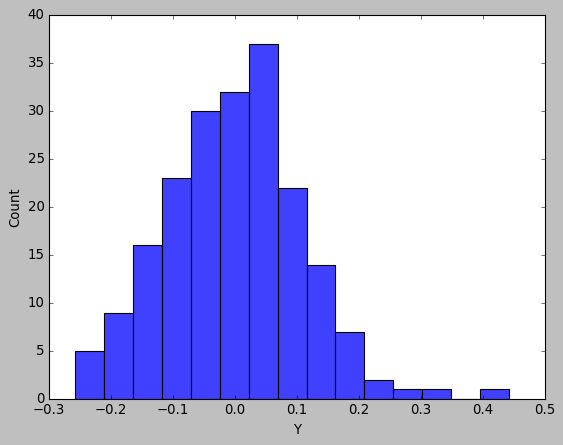

In [556]:
sns.histplot(std_resids)

#### Multicollinearity

In [557]:
acl_test = pd.read_csv('ACL test.csv')
acl_test

,ACL,SDMT,Vocab,Abstract
0,4.5,23,24,24
1,5.9,50,18,14
2,4.8,27,14,8
3,4.5,26,15,10
4,5.9,42,30,32
5,4.7,35,26,26
6,5.6,41,19,16
7,4.8,13,14,10
8,4.5,46,21,20
9,4.8,52,26,28


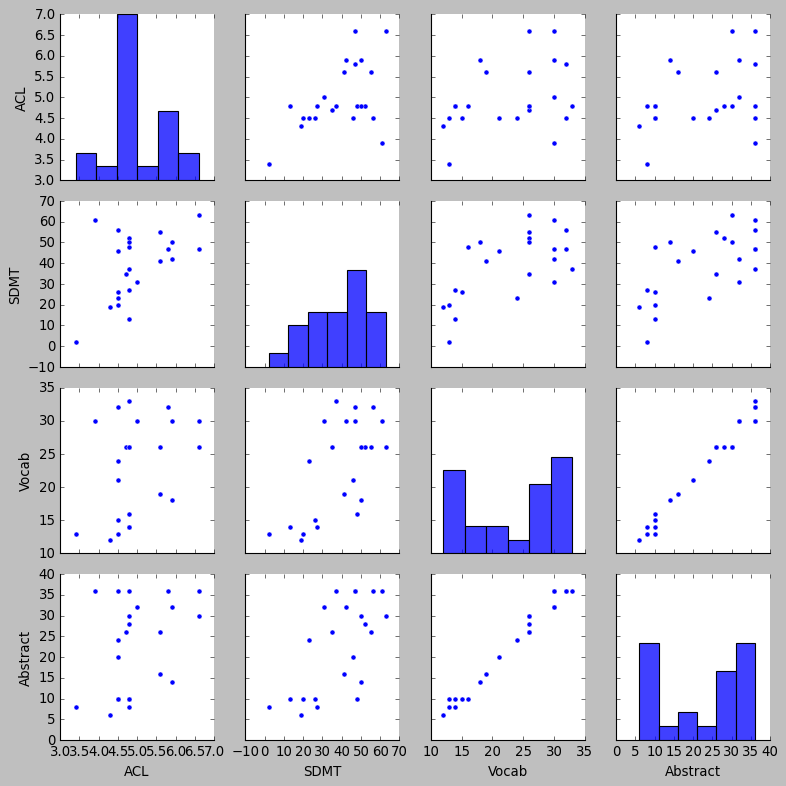

In [558]:
sns.pairplot(acl_test)

In [559]:
acl_test.corr()

,ACL,SDMT,Vocab,Abstract
ACL,1.000000,0.510750,0.366218,0.367352
SDMT,0.510750,1.000000,0.635370,0.647467
Vocab,0.366218,0.635370,1.000000,0.989777
Abstract,0.367352,0.647467,0.989777,1.000000


In [560]:
X = sm.add_constant(acl_test.drop('ACL', axis = 1))
y = acl_test['ACL']

In [561]:
import statsmodels.stats.outliers_influence as smo
print("SDMT VIF:", smo.variance_inflation_factor(exog = np.array(X), exog_idx=1))
print("Vocab VIF:", smo.variance_inflation_factor(exog = np.array(X), exog_idx=2))
print("Abstract VIF:", smo.variance_inflation_factor(exog = np.array(X), exog_idx=3))

SDMT VIF: 1.7261852740005994
Vocab VIF: 49.286238682129245
Abstract VIF: 50.60308486118107


Collect more data

In [562]:
acl_test_2 = pd.read_csv('ACL test 2.csv')
acl_test_2

,ACL,Vocab,Abstract,SDMT
0,6.0,28,36,70
1,5.4,34,32,49
2,4.7,19,8,28
3,4.8,32,28,47
4,4.9,22,4,29
...,...,...,...,...
64,6.6,26,30,63
65,4.1,16,16,17
66,4.5,31,24,44
67,6.6,30,36,47


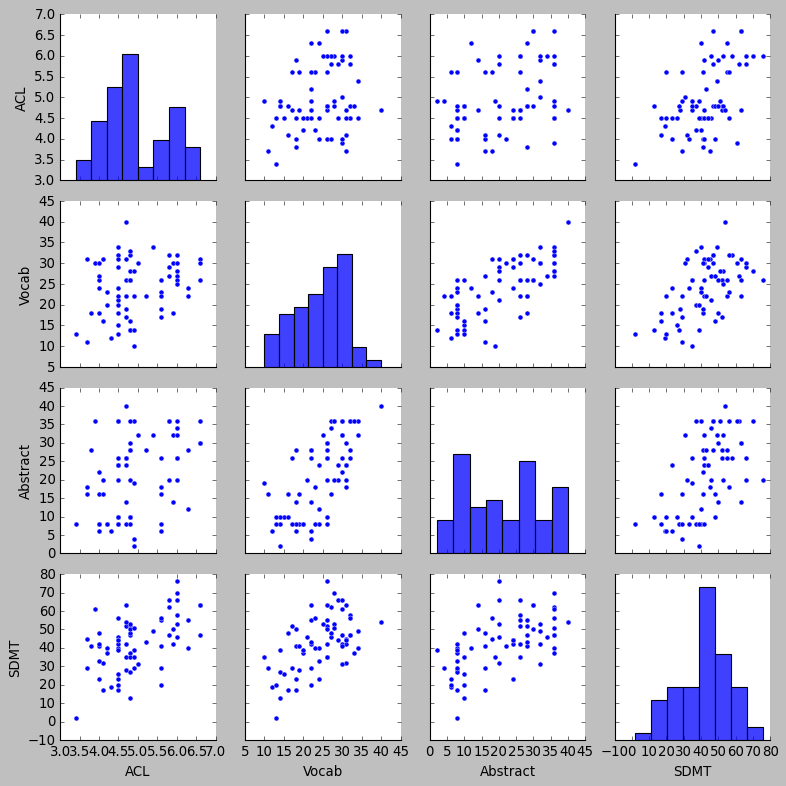

In [563]:
sns.pairplot(acl_test_2)

In [564]:
acl_test_2.corr()

,ACL,Vocab,Abstract,SDMT
ACL,1.000000,0.250000,0.353738,0.520877
Vocab,0.250000,1.000000,0.697840,0.556071
Abstract,0.353738,0.697840,1.000000,0.576924
SDMT,0.520877,0.556071,0.576924,1.000000


In [565]:
X = sm.add_constant(acl_test_2.drop('ACL', axis = 1))
y = acl_test_2['ACL']
print("SDMT VIF:", smo.variance_inflation_factor(exog = np.array(X), exog_idx=1))
print("Vocab VIF:", smo.variance_inflation_factor(exog = np.array(X), exog_idx=2))
print("Abstract VIF:", smo.variance_inflation_factor(exog = np.array(X), exog_idx=3))

SDMT VIF: 2.0932972330713193
Vocab VIF: 2.1674284112401403
Abstract VIF: 1.609662434801304


## Model Diagnosis Example

In [566]:
cars = pd.read_csv('Cars Data.csv')
cars

,Make,Model,DriveTrain,Origin,Type,Cylinders,Engine Size (L),Horsepower,Invoice,Length (IN),MPG (City),MPG (Highway),MSRP,Weight (LBS),Wheelbase (IN)
0,Acura,3.5 RL 4dr,Front,Asia,Sedan,6.0,3.5,225,"$39,014",197,18,24,"$43,755",3880,115
1,Acura,3.5 RL w/Navigation 4dr,Front,Asia,Sedan,6.0,3.5,225,"$41,100",197,18,24,"$46,100",3893,115
2,Acura,MDX,All,Asia,SUV,6.0,3.5,265,"$33,337",189,17,23,"$36,945",4451,106
3,Acura,NSX coupe 2dr manual S,Rear,Asia,Sports,6.0,3.2,290,"$79,978",174,17,24,"$89,765",3153,100
4,Acura,RSX Type S 2dr,Front,Asia,Sedan,4.0,2.0,200,"$21,761",172,24,31,"$23,820",2778,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,S80 2.9 4dr,Front,Europe,Sedan,6.0,2.9,208,"$35,542",190,20,28,"$37,730",3576,110
424,Volvo,S80 T6 4dr,Front,Europe,Sedan,6.0,2.9,268,"$42,573",190,19,26,"$45,210",3653,110
425,Volvo,V40,Front,Europe,Wagon,4.0,1.9,170,"$24,641",180,22,29,"$26,135",2822,101
426,Volvo,XC70,All,Europe,Wagon,5.0,2.5,208,"$33,112",186,20,27,"$35,145",3823,109


In [567]:
cars_mpg_model_1 = LinearRegression(fit_intercept = True)
cars_mpg_model_1.fit(cars[['Horsepower']], cars[['MPG (City)']])
y_hat_1 = cars_mpg_model_1.predict(cars[['Horsepower']])
metrics.r2_score(cars[['MPG (City)']],y_hat_1)

0.45792195895012633

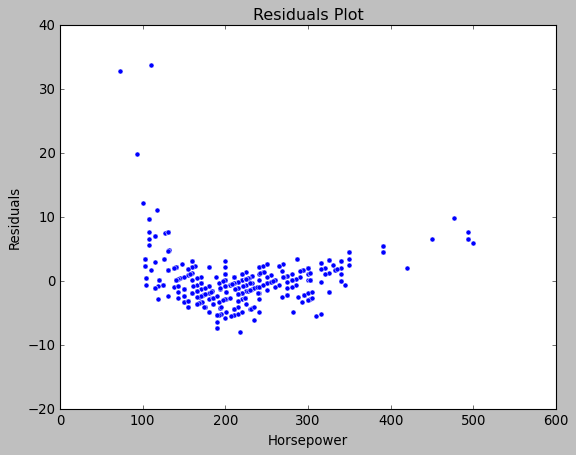

In [568]:
resids = cars['MPG (City)'] - y_hat_1.flatten()
sns.scatterplot(x = cars['Horsepower'], y = resids)
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

Do the same thing with Seaborn

<AxesSubplot:xlabel='Horsepower', ylabel='MPG (City)'>

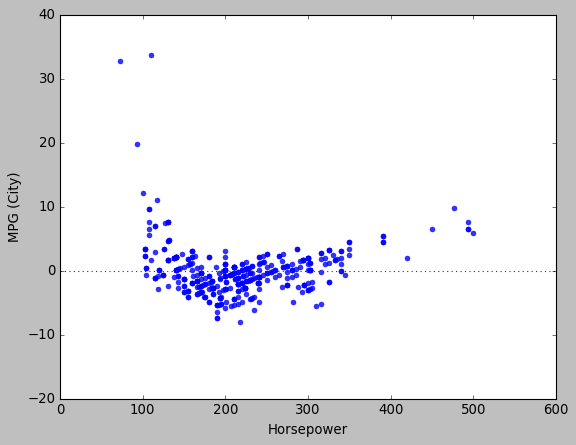

In [569]:
sns.residplot(x = cars['Horsepower'], y = cars['MPG (City)'])

Plot standardized residuals

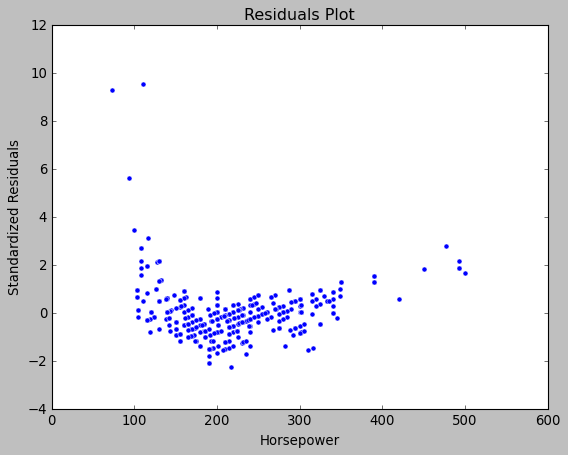

In [570]:
y_hat_1s = y_hat_1.std()
resids = (cars['MPG (City)'] - y_hat_1.flatten())/y_hat_1s
sns.scatterplot(x = cars['Horsepower'], y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

In [571]:
ols_model_q1 = stud_res = sm.OLS(cars['MPG (City)'], sm.add_constant(cars[['Horsepower']]))
ols_model_q1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             MPG (City)   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     359.9
Date:                Fri, 15 Jul 2022   Prob (F-statistic):           1.29e-58
Time:                        19:27:35   Log-Likelihood:                -1184.5
No. Observations:                 428   AIC:                             2373.
Df Residuals:                     426   BIC:                             2381.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.7135      0.592     51.902      0.000      29.550      31.877
Horsepower    -0.0493      0.003    -18.970      0.000      -0.054      -0.044
==============================================================================
Omnibus:                      377.046   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13256.944
Skew:                           3.578   Prob(JB):                         0.00
Kurtosis:                      29.309   Cond. No.                         721.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [572]:
stud_res = ols_model_q1.fit().outlier_test()
stud_res

,student_resid,unadj_p,bonf(p)
0,-0.417318,0.676657,1.0
1,-0.417318,0.676657,1.0
2,-0.165128,0.868922,1.0
3,0.154651,0.877170,1.0
4,0.817888,0.413879,1.0
...,...,...,...
423,-0.116508,0.907305,1.0
424,0.391588,0.695559,1.0
425,-0.084194,0.932941,1.0
426,-0.116508,0.907305,1.0


Text(0, 0.5, 'Studentized Residuals')

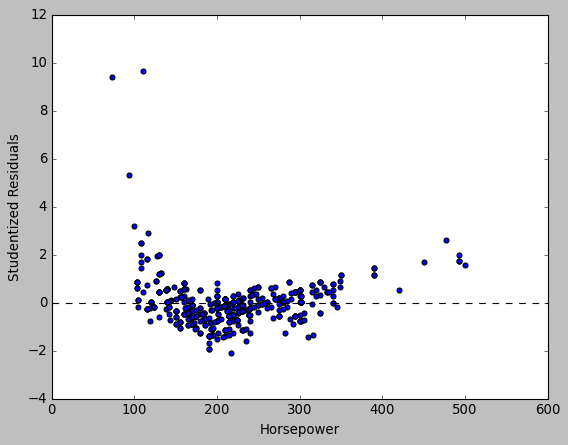

In [573]:
x = cars['Horsepower']
y = stud_res['student_resid']
plt.scatter(x, y)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Horsepower')
plt.ylabel('Studentized Residuals') 

Investigate observations with large residuals

In [574]:
cars[resids > 5]

,Make,Model,DriveTrain,Origin,Type,Cylinders,Engine Size (L),Horsepower,Invoice,Length (IN),MPG (City),MPG (Highway),MSRP,Weight (LBS),Wheelbase (IN)
156,Honda,Civic Hybrid 4dr manual (gas/electric),Front,Asia,Hybrid,4.0,1.4,93,"$18,451",175,46,51,"$20,140",2732,103
161,Honda,Insight 2dr (gas/electric),Front,Asia,Hybrid,3.0,2.0,73,"$17,911",155,60,66,"$19,110",1850,95
393,Toyota,Prius 4dr (gas/electric),Front,Asia,Hybrid,4.0,1.5,110,"$18,926",175,59,51,"$20,510",2890,106


In [575]:
cars.loc[cars['Type'] == "Hybrid"]

,Make,Model,DriveTrain,Origin,Type,Cylinders,Engine Size (L),Horsepower,Invoice,Length (IN),MPG (City),MPG (Highway),MSRP,Weight (LBS),Wheelbase (IN)
156,Honda,Civic Hybrid 4dr manual (gas/electric),Front,Asia,Hybrid,4.0,1.4,93,"$18,451",175,46,51,"$20,140",2732,103
161,Honda,Insight 2dr (gas/electric),Front,Asia,Hybrid,3.0,2.0,73,"$17,911",155,60,66,"$19,110",1850,95
393,Toyota,Prius 4dr (gas/electric),Front,Asia,Hybrid,4.0,1.5,110,"$18,926",175,59,51,"$20,510",2890,106


Re-run SLR model with outliers removed

In [576]:
cars_nohybrid = cars.loc[cars['Type'] != "Hybrid"].copy()
cars_mpg_model_2 = LinearRegression(fit_intercept = True)
cars_mpg_model_2.fit(cars_nohybrid[['Horsepower']], cars_nohybrid[['MPG (City)']])
y_hat_2 = cars_mpg_model_1.predict(cars_nohybrid[['Horsepower']])
metrics.r2_score(cars_nohybrid[['MPG (City)']],y_hat_2)

0.5272322319593947

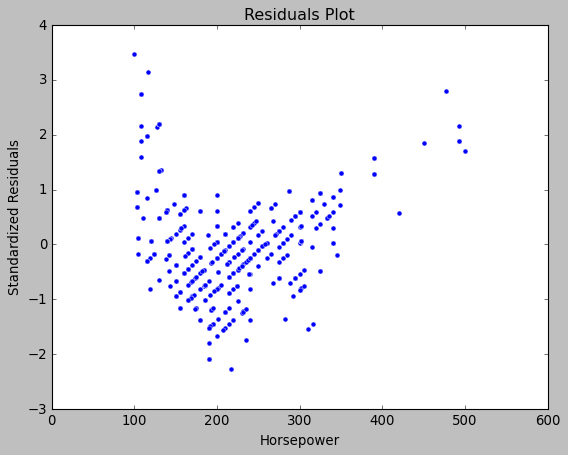

In [577]:
resids = (cars_nohybrid['MPG (City)'] - y_hat_2.flatten())/y_hat_2.std()
sns.scatterplot(x = cars_nohybrid['Horsepower'], y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

Scatterplot of predictor vs response and model

Text(0, 0.5, 'MPG (City)')

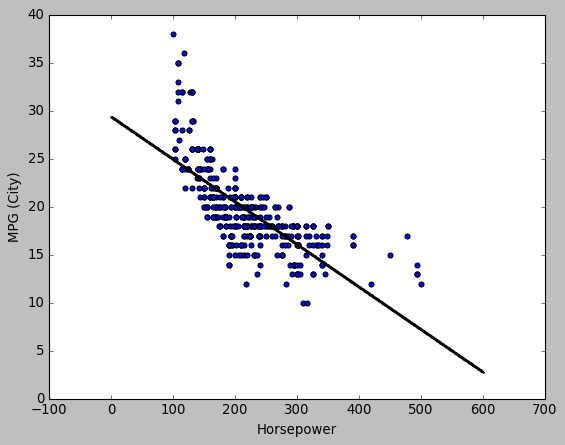

In [578]:
x_fit = np.linspace(0,600, num = 1200)[:,np.newaxis]
y_fit_1 = cars_mpg_model_2.predict(x_fit)
plt.scatter(x = cars_nohybrid[['Horsepower']], y = cars_nohybrid[['MPG (City)']])
plt.scatter(x = x_fit, y = y_fit_1, s=1)
plt.xlabel('Horsepower')
plt.ylabel('MPG (City)')

Try polynomial model

In [579]:
cars_nohybrid['HP^2'] = cars_nohybrid['Horsepower']**2
cars_mpg_model_3 = LinearRegression(fit_intercept = True)
cars_mpg_model_3.fit(cars_nohybrid[['Horsepower', 'HP^2']], cars_nohybrid['MPG (City)'])
y_hat_3 = cars_mpg_model_3.predict(cars_nohybrid[['Horsepower', 'HP^2']])
metrics.r2_score(cars_nohybrid[['MPG (City)']],y_hat_3)

0.6621944231230866

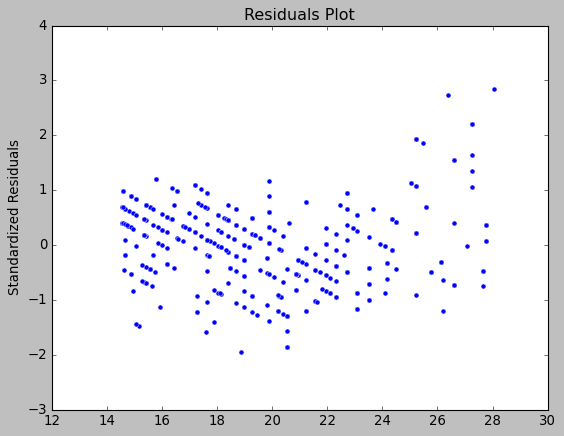

In [580]:
resids = (cars_nohybrid['MPG (City)'] - y_hat_3.flatten())/y_hat_3.std()
sns.scatterplot(x = y_hat_3, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

#### Trying higher order polynomials with sklearn's polynomial features

Second order polynomial

In [581]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
poly_X = poly.fit_transform(cars_nohybrid[['Horsepower']])
poly_X

array([[1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 2.2500e+02, 5.0625e+04],
       [1.0000e+00, 2.6500e+02, 7.0225e+04],
       ...,
       [1.0000e+00, 1.7000e+02, 2.8900e+04],
       [1.0000e+00, 2.0800e+02, 4.3264e+04],
       [1.0000e+00, 2.6800e+02, 7.1824e+04]])

In [582]:
cars_mpg_model_4 = LinearRegression(fit_intercept = True)
cars_mpg_model_4.fit(poly_X, cars_nohybrid['MPG (City)'])
y_hat_4 = cars_mpg_model_4.predict(poly_X)
metrics.r2_score(cars_nohybrid[['MPG (City)']],y_hat_4)

0.6621944231230866

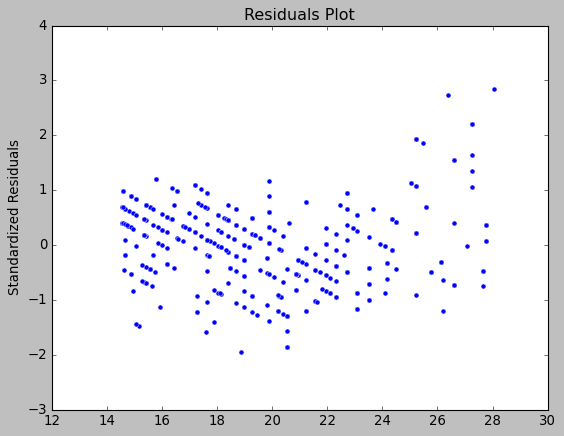

In [583]:
resids = (cars_nohybrid['MPG (City)'] - y_hat_4.flatten())/y_hat_4.std()
sns.scatterplot(x = y_hat_4, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

Text(0, 0.5, 'MPG (City)')

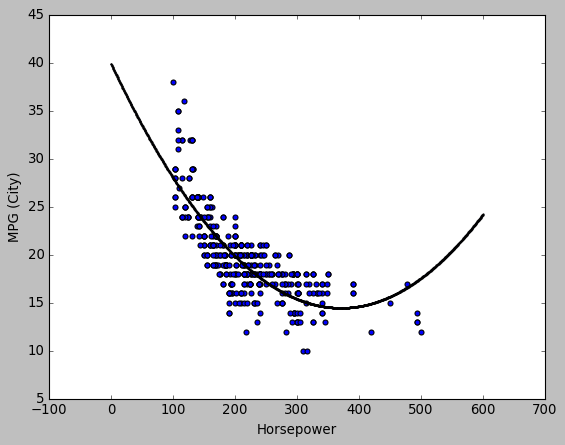

In [584]:
x_poly_fit = poly.fit_transform(x_fit)
y_fit_2 = cars_mpg_model_4.predict(x_poly_fit)
plt.scatter(x = cars_nohybrid[['Horsepower']], y = cars_nohybrid[['MPG (City)']])
plt.scatter(x = x_fit, y = y_fit_2, s=1)
plt.xlabel('Horsepower')
plt.ylabel('MPG (City)')

Third order polynomial

In [585]:
poly = PolynomialFeatures(degree = 3)
poly_X = poly.fit_transform(cars_nohybrid[['Horsepower']])
poly_X

array([[1.0000000e+00, 2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [1.0000000e+00, 2.2500000e+02, 5.0625000e+04, 1.1390625e+07],
       [1.0000000e+00, 2.6500000e+02, 7.0225000e+04, 1.8609625e+07],
       ...,
       [1.0000000e+00, 1.7000000e+02, 2.8900000e+04, 4.9130000e+06],
       [1.0000000e+00, 2.0800000e+02, 4.3264000e+04, 8.9989120e+06],
       [1.0000000e+00, 2.6800000e+02, 7.1824000e+04, 1.9248832e+07]])

In [586]:
cars_mpg_model_4 = LinearRegression(fit_intercept = True)
cars_mpg_model_4.fit(poly_X, cars_nohybrid['MPG (City)'])
y_hat_4 = cars_mpg_model_4.predict(poly_X)
metrics.r2_score(cars_nohybrid[['MPG (City)']],y_hat_4)

0.7094281565698562

In [587]:
metrics.mean_squared_error(cars_nohybrid[['MPG (City)']],y_hat_4)

5.40553555235695

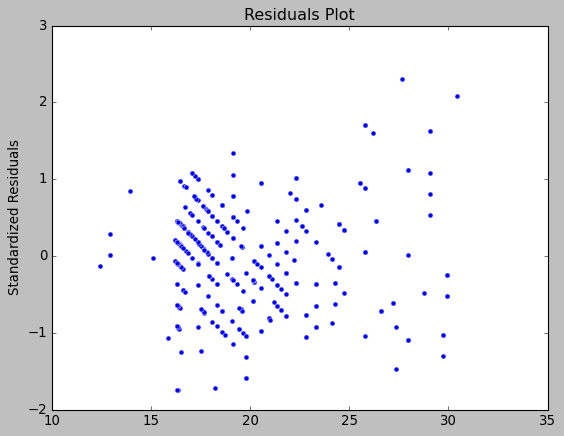

In [588]:
resids = (cars_nohybrid['MPG (City)'] - y_hat_4.flatten())/y_hat_4.std()
sns.scatterplot(x = y_hat_4, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

Text(0, 0.5, 'MPG (City)')

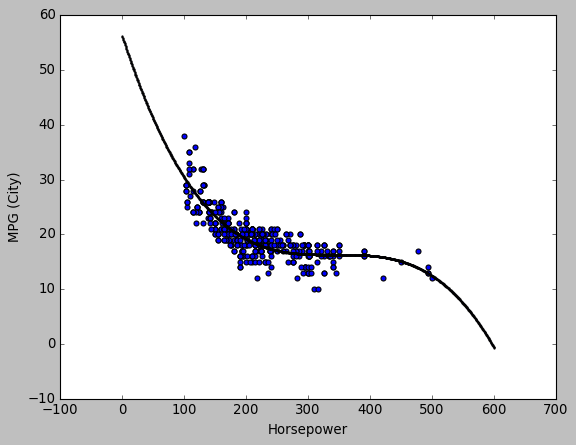

In [589]:
x_poly_fit = poly.fit_transform(x_fit)
y_fit_3 = cars_mpg_model_4.predict(x_poly_fit)
plt.scatter(x = cars_nohybrid[['Horsepower']], y = cars_nohybrid[['MPG (City)']])
plt.scatter(x = x_fit, y = y_fit_3, s=1)
plt.xlabel('Horsepower')
plt.ylabel('MPG (City)')

In [590]:
x_poly_fit

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00417014e-01, 2.50417188e-01, 1.25313022e-01],
       [1.00000000e+00, 1.00083403e+00, 1.00166875e+00, 1.00250417e+00],
       ...,
       [1.00000000e+00, 5.98999166e+02, 3.58800001e+05, 2.14920901e+08],
       [1.00000000e+00, 5.99499583e+02, 3.59399750e+05, 2.15460000e+08],
       [1.00000000e+00, 6.00000000e+02, 3.60000000e+05, 2.16000000e+08]])

Fourth order polynomial

In [591]:
poly = PolynomialFeatures(degree = 4)
poly_X = poly.fit_transform(cars_nohybrid[['Horsepower']])
poly_X

array([[1.00000000e+00, 2.25000000e+02, 5.06250000e+04, 1.13906250e+07,
        2.56289062e+09],
       [1.00000000e+00, 2.25000000e+02, 5.06250000e+04, 1.13906250e+07,
        2.56289062e+09],
       [1.00000000e+00, 2.65000000e+02, 7.02250000e+04, 1.86096250e+07,
        4.93155062e+09],
       ...,
       [1.00000000e+00, 1.70000000e+02, 2.89000000e+04, 4.91300000e+06,
        8.35210000e+08],
       [1.00000000e+00, 2.08000000e+02, 4.32640000e+04, 8.99891200e+06,
        1.87177370e+09],
       [1.00000000e+00, 2.68000000e+02, 7.18240000e+04, 1.92488320e+07,
        5.15868698e+09]])

In [592]:
cars_mpg_model_4 = LinearRegression(fit_intercept = True)
cars_mpg_model_4.fit(poly_X, cars_nohybrid['MPG (City)'])
y_hat_4 = cars_mpg_model_4.predict(poly_X)
metrics.r2_score(cars_nohybrid[['MPG (City)']],y_hat_4)

0.7144759855213141

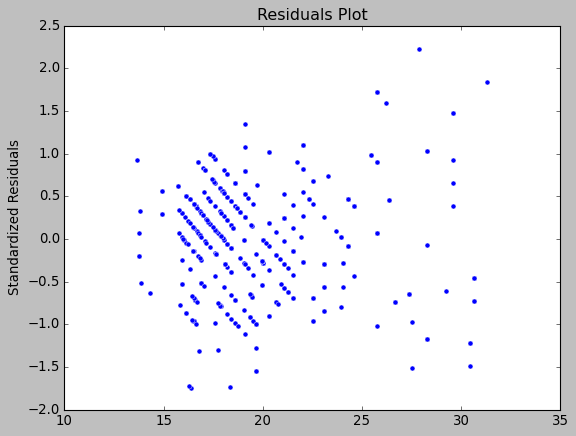

In [593]:
resids = (cars_nohybrid['MPG (City)'] - y_hat_4.flatten())/y_hat_4.std()
sns.scatterplot(x = y_hat_4, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

Text(0, 0.5, 'MPG (City)')

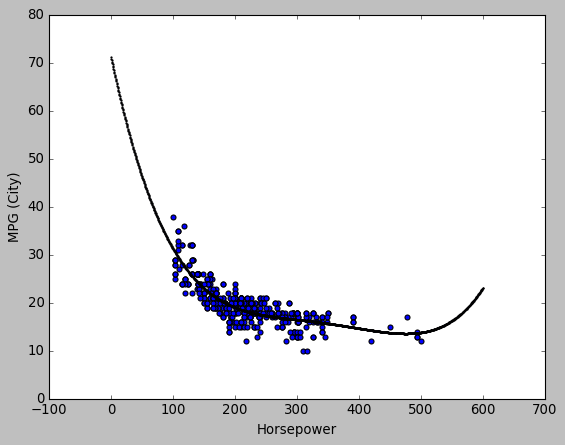

In [594]:
x_poly_fit = poly.fit_transform(x_fit)
y_fit_4 = cars_mpg_model_4.predict(x_poly_fit)
plt.scatter(x = cars_nohybrid[['Horsepower']], y = cars_nohybrid[['MPG (City)']])
plt.scatter(x = x_fit, y = y_fit_4, s=1)
plt.xlabel('Horsepower')
plt.ylabel('MPG (City)')

Fifth order polynomial

In [595]:
poly = PolynomialFeatures(degree = 5)
poly_X = poly.fit_transform(cars_nohybrid[['Horsepower']])
poly_X

array([[1.00000000e+00, 2.25000000e+02, 5.06250000e+04, 1.13906250e+07,
        2.56289062e+09, 5.76650391e+11],
       [1.00000000e+00, 2.25000000e+02, 5.06250000e+04, 1.13906250e+07,
        2.56289062e+09, 5.76650391e+11],
       [1.00000000e+00, 2.65000000e+02, 7.02250000e+04, 1.86096250e+07,
        4.93155062e+09, 1.30686092e+12],
       ...,
       [1.00000000e+00, 1.70000000e+02, 2.89000000e+04, 4.91300000e+06,
        8.35210000e+08, 1.41985700e+11],
       [1.00000000e+00, 2.08000000e+02, 4.32640000e+04, 8.99891200e+06,
        1.87177370e+09, 3.89328929e+11],
       [1.00000000e+00, 2.68000000e+02, 7.18240000e+04, 1.92488320e+07,
        5.15868698e+09, 1.38252811e+12]])

In [596]:
cars_mpg_model_4 = LinearRegression(fit_intercept = True)
cars_mpg_model_4.fit(poly_X, cars_nohybrid['MPG (City)'])
y_hat_4 = cars_mpg_model_4.predict(poly_X)
metrics.r2_score(cars_nohybrid[['MPG (City)']],y_hat_4)

0.7154509280311773

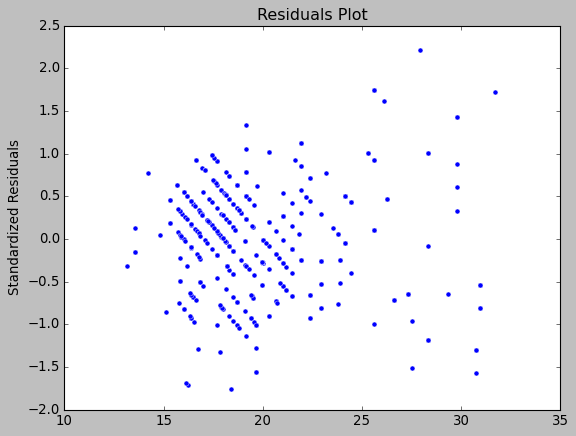

In [597]:
resids = (cars_nohybrid['MPG (City)'] - y_hat_4.flatten())/y_hat_4.std()
sns.scatterplot(x = y_hat_4, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

Text(0, 0.5, 'MPG (City)')

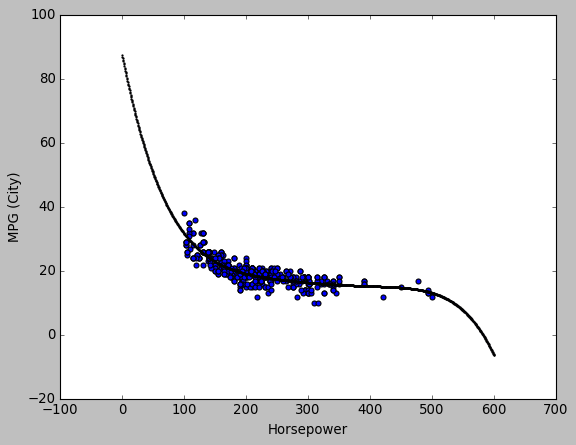

In [598]:
x_poly_fit = poly.fit_transform(x_fit)
y_fit_5 = cars_mpg_model_4.predict(x_poly_fit)
plt.scatter(x = cars_nohybrid[['Horsepower']], y = cars_nohybrid[['MPG (City)']])
plt.scatter(x = x_fit, y = y_fit_5, s=1)
plt.xlabel('Horsepower')
plt.ylabel('MPG (City)')

In [599]:
x_poly_fit

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00417014e-01, 2.50417188e-01, 1.25313022e-01,
        6.27087681e-02, 3.13805345e-02],
       [1.00000000e+00, 1.00083403e+00, 1.00166875e+00, 1.00250417e+00,
        1.00334029e+00, 1.00417710e+00],
       ...,
       [1.00000000e+00, 5.98999166e+02, 3.58800001e+05, 2.14920901e+08,
        1.28737441e+11, 7.71136195e+13],
       [1.00000000e+00, 5.99499583e+02, 3.59399750e+05, 2.15460000e+08,
        1.29168180e+11, 7.74362702e+13],
       [1.00000000e+00, 6.00000000e+02, 3.60000000e+05, 2.16000000e+08,
        1.29600000e+11, 7.77600000e+13]])

Add weight to model as a predictor

<AxesSubplot:xlabel='Weight (LBS)', ylabel='MPG (City)'>

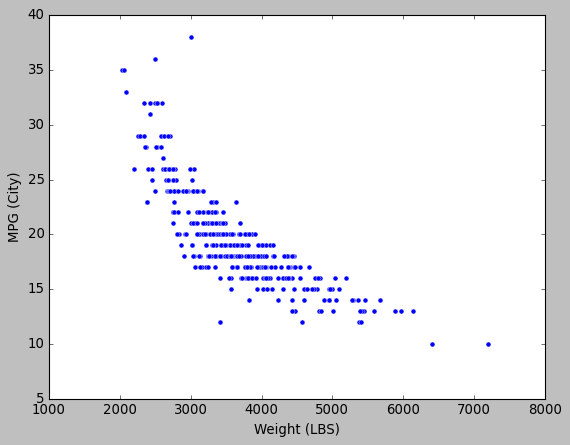

In [600]:
sns.scatterplot(data = cars_nohybrid, x = 'Weight (LBS)', y = 'MPG (City)')

In [601]:
cars_nohybrid

,Make,Model,DriveTrain,Origin,Type,Cylinders,Engine Size (L),Horsepower,Invoice,Length (IN),MPG (City),MPG (Highway),MSRP,Weight (LBS),Wheelbase (IN),HP^2
0,Acura,3.5 RL 4dr,Front,Asia,Sedan,6.0,3.5,225,"$39,014",197,18,24,"$43,755",3880,115,50625
1,Acura,3.5 RL w/Navigation 4dr,Front,Asia,Sedan,6.0,3.5,225,"$41,100",197,18,24,"$46,100",3893,115,50625
2,Acura,MDX,All,Asia,SUV,6.0,3.5,265,"$33,337",189,17,23,"$36,945",4451,106,70225
3,Acura,NSX coupe 2dr manual S,Rear,Asia,Sports,6.0,3.2,290,"$79,978",174,17,24,"$89,765",3153,100,84100
4,Acura,RSX Type S 2dr,Front,Asia,Sedan,4.0,2.0,200,"$21,761",172,24,31,"$23,820",2778,101,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Volvo,S80 2.9 4dr,Front,Europe,Sedan,6.0,2.9,208,"$35,542",190,20,28,"$37,730",3576,110,43264
424,Volvo,S80 T6 4dr,Front,Europe,Sedan,6.0,2.9,268,"$42,573",190,19,26,"$45,210",3653,110,71824
425,Volvo,V40,Front,Europe,Wagon,4.0,1.9,170,"$24,641",180,22,29,"$26,135",2822,101,28900
426,Volvo,XC70,All,Europe,Wagon,5.0,2.5,208,"$33,112",186,20,27,"$35,145",3823,109,43264


In [602]:
y = cars_nohybrid['MPG (City)']
X = cars_nohybrid[['Horsepower', 'HP^2', 'Weight (LBS)']]
cars_mpg_model_5 = LinearRegression(fit_intercept = True)
cars_mpg_model_5.fit(X,y)
y_hat_5 = cars_mpg_model_5.predict(X)
metrics.r2_score(y,y_hat_5)

0.7838891024041952

In [603]:
metrics.mean_squared_error(y,y_hat_5)

4.020331517381656

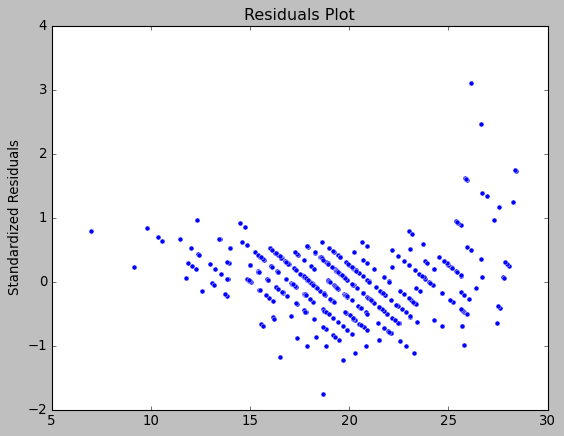

In [604]:
resids = (y - y_hat_5.flatten())/y_hat_5.std()
sns.scatterplot(x = y_hat_5, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

Try adding drivetrain

In [605]:
temp = pd.get_dummies(cars_nohybrid['DriveTrain'], drop_first = True)
X2 = pd.concat([X.copy(), temp], axis = 1)
X2

,Horsepower,HP^2,Weight (LBS),Front,Rear
0,225,50625,3880,1,0
1,225,50625,3893,1,0
2,265,70225,4451,0,0
3,290,84100,3153,0,1
4,200,40000,2778,1,0
...,...,...,...,...,...
423,208,43264,3576,1,0
424,268,71824,3653,1,0
425,170,28900,2822,1,0
426,208,43264,3823,0,0


In [606]:
cars_mpg_model_6 = LinearRegression(fit_intercept = True)
cars_mpg_model_6.fit(X2,y)
y_hat_6 = cars_mpg_model_6.predict(X2)
metrics.r2_score(y,y_hat_6)

0.7941354710995312

In [607]:
metrics.mean_squared_error(y,y_hat_6)

3.8297173490872956

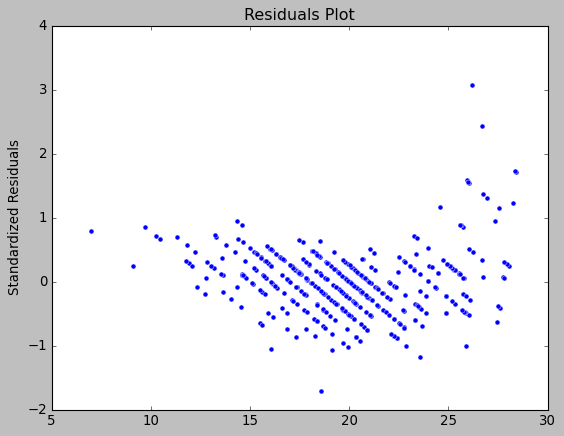

In [608]:
resids = (y - y_hat_6.flatten())/y_hat_6.std()
sns.scatterplot(x = y_hat_6, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

In [609]:
cars_mpg_model_6.intercept_

39.51190943706037

In [610]:
pd.DataFrame(cars_mpg_model_6.coef_, columns = ['Coefficients'], index = X2.columns)

,Coefficients
Horsepower,-0.071168
HP^2,0.000096
Weight (LBS),-0.002732
Front,1.020150
Rear,0.056390


Try adding type

In [611]:
temp = pd.get_dummies(cars_nohybrid['Type'], drop_first = True)
X3 = pd.concat([X.copy(), temp], axis = 1)
X3

,Horsepower,HP^2,Weight (LBS),Sedan,Sports,Truck,Wagon
0,225,50625,3880,1,0,0,0
1,225,50625,3893,1,0,0,0
2,265,70225,4451,0,0,0,0
3,290,84100,3153,0,1,0,0
4,200,40000,2778,1,0,0,0
...,...,...,...,...,...,...,...
423,208,43264,3576,1,0,0,0
424,268,71824,3653,1,0,0,0
425,170,28900,2822,0,0,0,1
426,208,43264,3823,0,0,0,1


In [612]:
cars_mpg_model_7 = LinearRegression(fit_intercept = True)
cars_mpg_model_7.fit(X3,y)
y_hat_7 = cars_mpg_model_7.predict(X3)
metrics.r2_score(y,y_hat_7)

0.7995447864919485

In [613]:
metrics.mean_squared_error(y,y_hat_7)

3.72908734198665

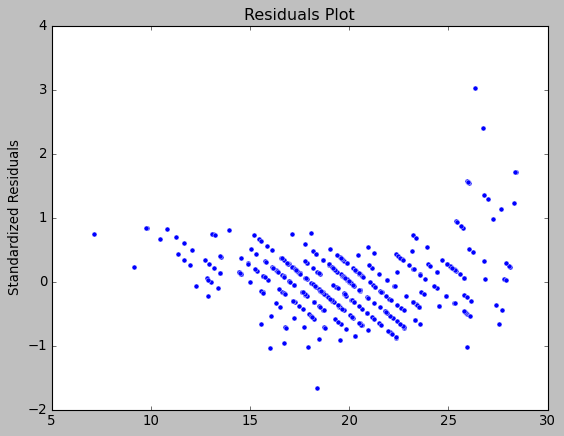

In [614]:
resids = (y - y_hat_7.flatten())/y_hat_7.std()
sns.scatterplot(x = y_hat_7, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

In [615]:
pd.DataFrame(cars_mpg_model_7.coef_, columns = ['Coefficients'], index = X3.columns)

,Coefficients
Horsepower,-0.077654
HP^2,0.000106
Weight (LBS),-0.002607
Sedan,1.102892
Sports,-0.161216
Truck,-0.480552
Wagon,0.948492


#### Try adding interaction effect between drive train and horsepower

In [616]:
X4 = X2.copy()
X4['HP*Front'] = X4['Horsepower'] * X4['Front']
X4['HP*Rear'] = X4['Horsepower'] * X4['Rear']
X4

,Horsepower,HP^2,Weight (LBS),Front,Rear,HP*Front,HP*Rear
0,225,50625,3880,1,0,225,0
1,225,50625,3893,1,0,225,0
2,265,70225,4451,0,0,0,0
3,290,84100,3153,0,1,0,290
4,200,40000,2778,1,0,200,0
...,...,...,...,...,...,...,...
423,208,43264,3576,1,0,208,0
424,268,71824,3653,1,0,268,0
425,170,28900,2822,1,0,170,0
426,208,43264,3823,0,0,0,0


In [617]:
cars_mpg_model_8 = LinearRegression(fit_intercept = True)
cars_mpg_model_8.fit(X4,y)
y_hat_8 = cars_mpg_model_8.predict(X4)
metrics.r2_score(y,y_hat_8)

0.8075339523235919

In [618]:
metrics.mean_squared_error(y,y_hat_8)

3.5804641325702624

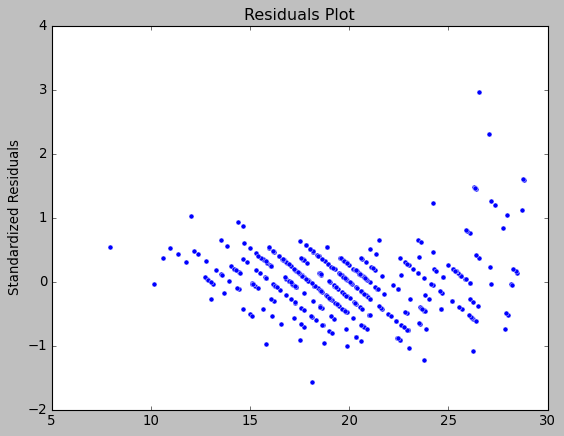

In [619]:
resids = (y - y_hat_8.flatten())/y_hat_8.std()
sns.scatterplot(x = y_hat_8, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()

In [620]:
cars_mpg_model_8.intercept_

35.11780101422048

In [621]:
pd.DataFrame(cars_mpg_model_8.coef_, columns = ['Coefficients'], index = X4.columns)

,Coefficients
Horsepower,-0.046882
HP^2,0.000079
Weight (LBS),-0.002813
Front,6.054361
Rear,3.288474
HP*Front,-0.022874
HP*Rear,-0.013960


#### Look at skew of resonse and predictors

<AxesSubplot:xlabel='Horsepower', ylabel='Count'>

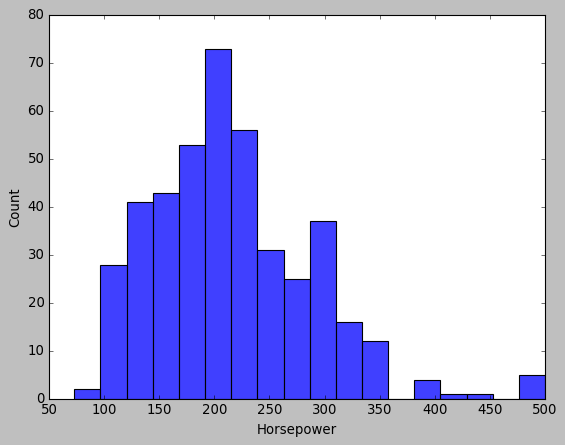

In [622]:
sns.histplot(cars['Horsepower'])

<AxesSubplot:xlabel='Horsepower', ylabel='Count'>

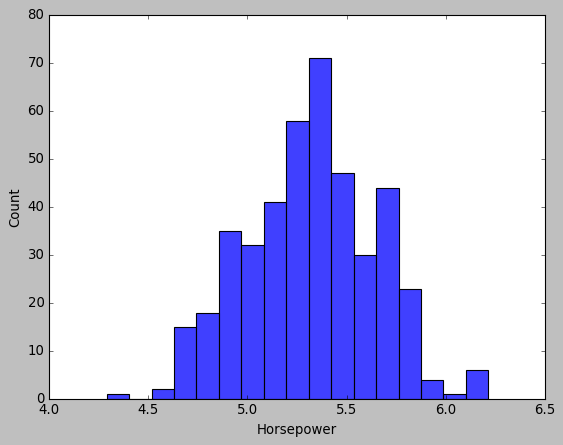

In [623]:
sns.histplot(np.log(cars['Horsepower']))

<AxesSubplot:xlabel='MPG (City)', ylabel='Count'>

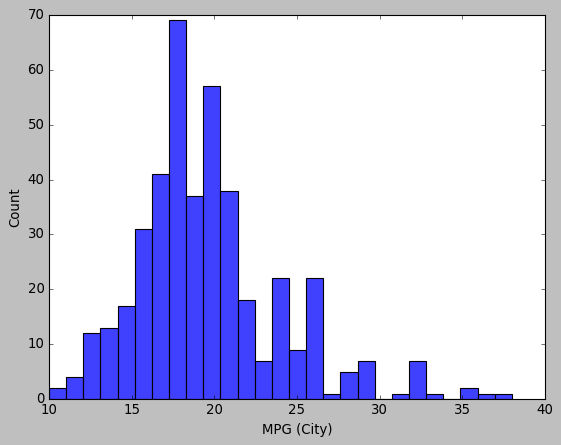

In [624]:
sns.histplot(cars_nohybrid['MPG (City)'])

<AxesSubplot:xlabel='MPG (City)', ylabel='Count'>

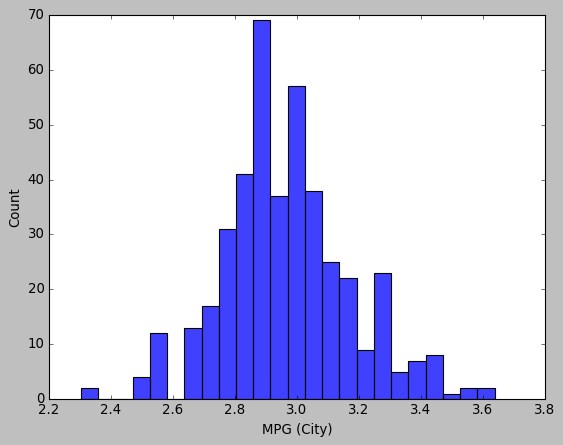

In [625]:
sns.histplot(np.log(cars_nohybrid['MPG (City)']))

<AxesSubplot:xlabel='Weight (LBS)', ylabel='Count'>

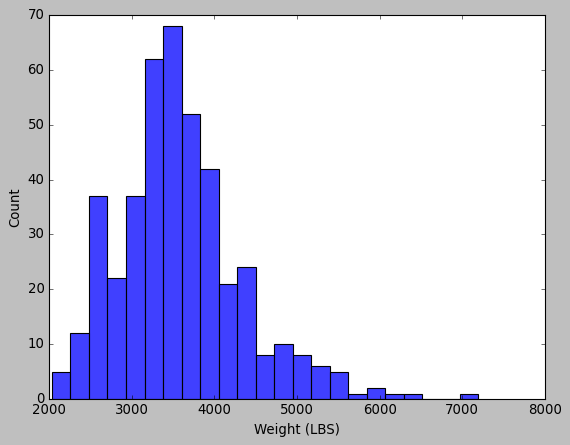

In [626]:
sns.histplot(cars_nohybrid['Weight (LBS)'])

<AxesSubplot:xlabel='Weight (LBS)', ylabel='Count'>

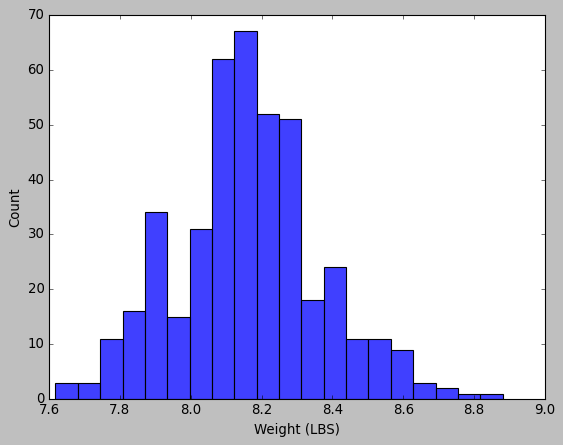

In [627]:
sns.histplot(np.log(cars_nohybrid['Weight (LBS)']))

In [628]:
X2

,Horsepower,HP^2,Weight (LBS),Front,Rear
0,225,50625,3880,1,0
1,225,50625,3893,1,0
2,265,70225,4451,0,0
3,290,84100,3153,0,1
4,200,40000,2778,1,0
...,...,...,...,...,...
423,208,43264,3576,1,0
424,268,71824,3653,1,0
425,170,28900,2822,1,0
426,208,43264,3823,0,0


In [629]:
cars_mpg_model_9 = LinearRegression(fit_intercept = True)
cars_mpg_model_9.fit(X2,np.log(y))
y_hat_9 = cars_mpg_model_9.predict(X2)
metrics.r2_score(np.log(y),y_hat_9)

0.8384193587010541

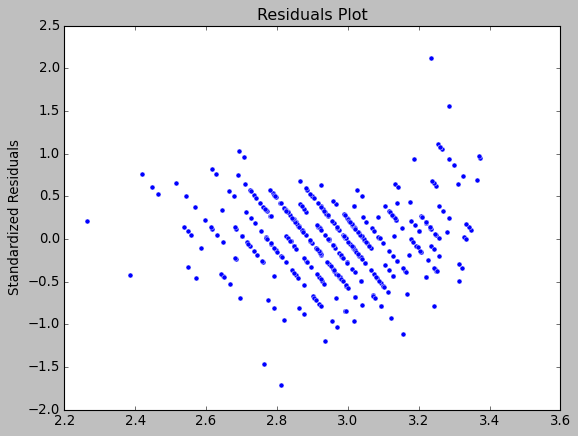

In [630]:
resids = (np.log(y) - y_hat_9.flatten())/y_hat_9.std()
sns.scatterplot(x = y_hat_9, y = resids)
plt.ylabel("Standardized Residuals")
plt.title("Residuals Plot")
plt.show()